In [1]:
import glob

images_filenames = glob.glob(glob.escape("../Lab2/data/images") + "/*.png")
new_images_filenames = glob.glob(glob.escape("dataset/images") + "/*.jpg")[:800]


In [2]:
from prometheus_client import start_http_server, Gauge
import time
import random

# start_http_server(8000)

# METRICS_BRIGHTNESS = Gauge('brightness', 'brightness_descr')
# METRICS_CONTRAST = Gauge('contrast', 'contrast_descr')

In [3]:
import cv2 as cv


image = cv.imread(images_filenames[0])
image.shape

(366, 512, 3)

In [4]:
def get_metrics(path):
    image = cv.imread(path)
    # image = cv.resize(image, (418, 418))
    grey_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    brightness = grey_image.mean()
    contrast = grey_image.std()
    return brightness, contrast

In [5]:
ids = [i for i in range(len(images_filenames))]
metrics_brightness = []
metrics_contrast = []

for path in images_filenames:
    brightness, contrast = get_metrics(path)
    metrics_brightness.append(brightness)
    metrics_contrast.append(contrast)
    # METRICS_BRIGHTNESS.set(float(brightness))
    # METRICS_CONTRAST.set(float(contrast))
    # time.sleep(1)

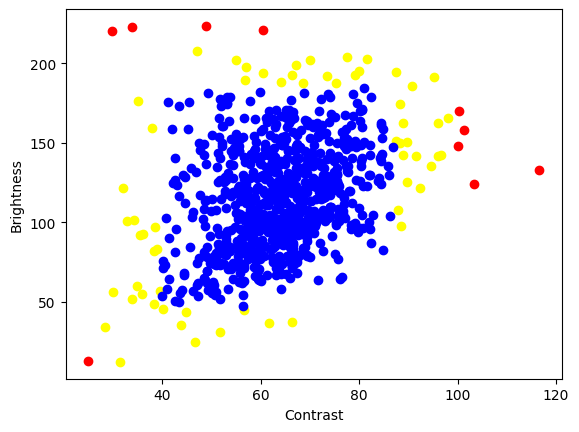

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math



plt.xlabel("Contrast")
plt.ylabel("Brightness")
# plt.plot(metrics_contrast, metrics_brightness, 'o')


for i in range(len(images_filenames)):
    color = 'red'

    if (math.fabs(metrics_brightness[i] - np.array(metrics_brightness).mean()) <= 3 * np.array(metrics_brightness).std()) \
        and (math.fabs(metrics_contrast[i] - np.array(metrics_contrast).mean()) <= 3 * np.array(metrics_contrast).std()):
        color = 'yellow'

    if (math.fabs(metrics_brightness[i] - np.array(metrics_brightness).mean()) <= 2 * np.array(metrics_brightness).std()) \
        and (math.fabs(metrics_contrast[i] - np.array(metrics_contrast).mean()) <= 2 * np.array(metrics_contrast).std()):
        color = 'blue'

    plt.plot(metrics_contrast[i], metrics_brightness[i], 'o', color=color)




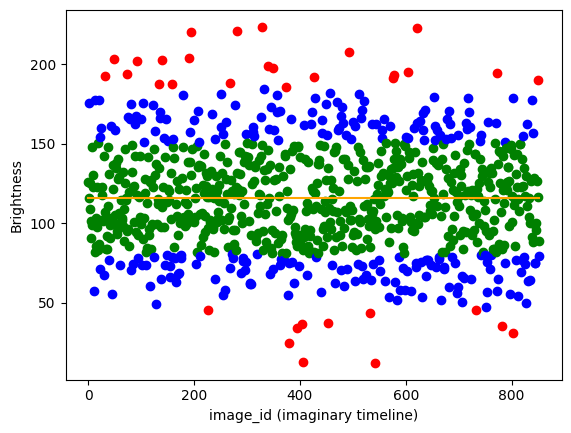

In [7]:

plt.close()

tmp = np.mean(np.array(metrics_brightness))

plt.xlabel("image_id (imaginary timeline)")
plt.ylabel("Brightness")

for i in range(len(images_filenames)):
    color = None
    if math.fabs(metrics_brightness[i] - np.array(metrics_brightness).mean()) <= 2 * np.array(metrics_brightness).std():
        color = 'blue'

    if math.fabs(metrics_brightness[i] - np.array(metrics_brightness).mean()) > 2 * np.array(metrics_brightness).std():
        color = 'red'

    if math.fabs(metrics_brightness[i] - np.array(metrics_brightness).mean()) < np.array(metrics_brightness).std():
        color = 'green'

    plt.plot(i, metrics_brightness[i], 'o', color=color)

plt.plot(ids, [tmp for i in range(len(images_filenames))], '-', color='orange')
plt.show()

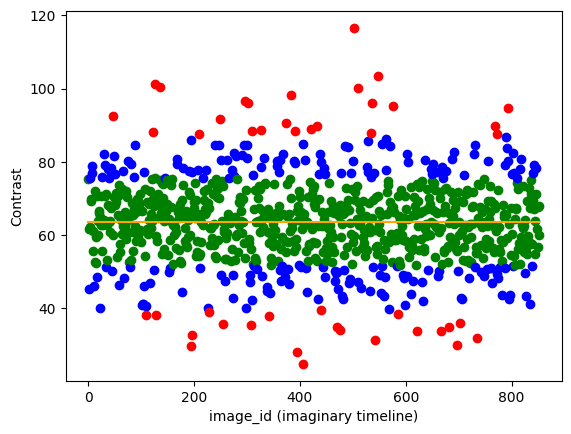

In [8]:
plt.close()

tmp = np.mean(np.array(metrics_contrast))

plt.xlabel("image_id (imaginary timeline)")
plt.ylabel("Contrast")

for i in range(len(images_filenames)):
    color = None
    if math.fabs(metrics_contrast[i] - np.array(metrics_contrast).mean()) <= 2 * np.array(metrics_contrast).std():
        color = 'blue'

    if math.fabs(metrics_contrast[i] - np.array(metrics_contrast).mean()) > 2 * np.array(metrics_contrast).std():
        color = 'red'

    if math.fabs(metrics_contrast[i] - np.array(metrics_contrast).mean()) < np.array(metrics_contrast).std():
        color = 'green'

    plt.plot(i, metrics_contrast[i], 'o', color=color)

# plt.plot(ids, metrics_brightness, 'o')
plt.plot(ids, [tmp for i in range(len(images_filenames))], '-', color='orange')
plt.show()

In [9]:
dataset_ids = [i for i in range(len(new_images_filenames))]
dataset_metrics_brightness = []
dataset_metrics_contrast = []

OFFSET_TO_CREATE_CONTRAST_DRIFT = 20
OFFSET_TO_CREATE_BRIGHTNESS_DRIFT = 60


for path in new_images_filenames:
    brightness, contrast = get_metrics(path)
    dataset_metrics_brightness.append(min(255, brightness + OFFSET_TO_CREATE_BRIGHTNESS_DRIFT))
    dataset_metrics_contrast.append(contrast + OFFSET_TO_CREATE_CONTRAST_DRIFT)
    # METRICS_BRIGHTNESS.set(float(min(255, brightness + OFFSET_TO_CREATE_BRIGHTNESS_DRIFT)))
    # METRICS_CONTRAST.set(float(contrast + OFFSET_TO_CREATE_CONTRAST_DRIFT))
    # time.sleep(1)

In [10]:
dataset_ids = np.array(dataset_ids)
dataset_ids += ids[-1]

TRAIN BRIGHTNESS VS REAL_DATA BRIGHTNESS

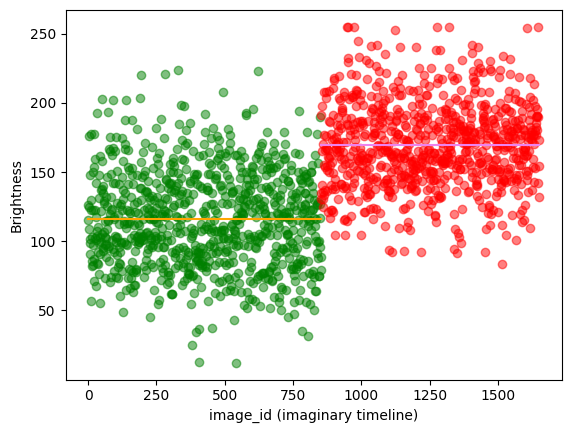

In [11]:
plt.close()

plt.xlabel("image_id (imaginary timeline)")
plt.ylabel("Brightness")

plt.plot(ids, metrics_brightness, 'o', color='green', alpha=0.5)
tmp = np.mean(np.array(metrics_brightness))
plt.plot(ids, [tmp for i in range(len(images_filenames))], '-', color='orange')
plt.plot(dataset_ids, dataset_metrics_brightness, 'o', color='red', alpha=0.5)
tmp = np.mean(np.array(dataset_metrics_brightness))
plt.plot(dataset_ids, [tmp for i in range(len(new_images_filenames))], '-', color='violet')
plt.show()

TRAIN CONTRAST VS REAL_CONTRAST

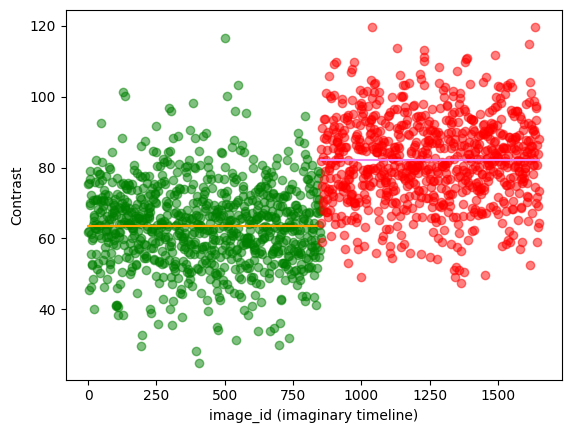

In [12]:
plt.close()

plt.xlabel("image_id (imaginary timeline)")
plt.ylabel("Contrast")

plt.plot(ids, metrics_contrast, 'o', color='green', alpha=0.5)
tmp = np.mean(np.array(metrics_contrast))
plt.plot(ids, [tmp for i in range(len(images_filenames))], '-', color='orange')
plt.plot(dataset_ids, dataset_metrics_contrast, 'o', color='red', alpha=0.5)
tmp = np.mean(np.array(dataset_metrics_contrast))
plt.plot(dataset_ids, [tmp for i in range(len(new_images_filenames))], '-', color='violet')
plt.show()

TRAIN BRIGHTNESS/CONTRAST VS REAL_DATA BRIGHTNESS/CONTRAST

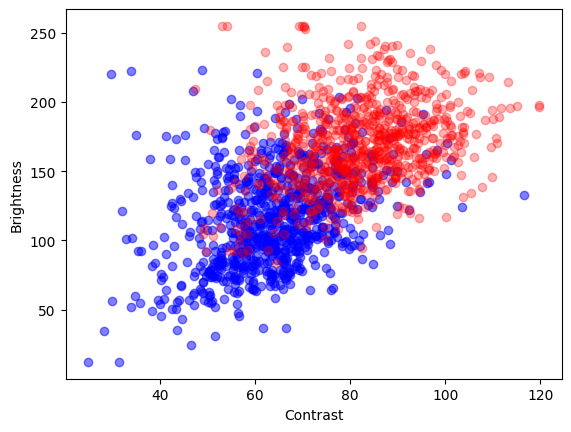

In [13]:
plt.close()

plt.xlabel("Contrast")
plt.ylabel("Brightness")

for i in range(len(images_filenames)):
    color = 'blue'

    # if (math.fabs(metrics_brightness[i] - np.array(metrics_brightness).mean()) <= 3 * np.array(metrics_brightness).std()) \
    #     and (math.fabs(metrics_contrast[i] - np.array(metrics_contrast).mean()) <= 3 * np.array(metrics_contrast).std()):
    #     color = 'yellow'

    # if (math.fabs(metrics_brightness[i] - np.array(metrics_brightness).mean()) <= 2 * np.array(metrics_brightness).std()) \
    #     and (math.fabs(metrics_contrast[i] - np.array(metrics_contrast).mean()) <= 2 * np.array(metrics_contrast).std()):
    #     color = 'blue'

    plt.plot(metrics_contrast[i], metrics_brightness[i], 'o', color=color, alpha=0.5)


for i in range(len(new_images_filenames)):
    color = 'red'

    # if (math.fabs(dataset_metrics_brightness[i] - np.array(dataset_metrics_brightness).mean()) <= 3 * np.array(dataset_metrics_brightness).std()) \
    #     and (math.fabs(dataset_metrics_contrast[i] - np.array(dataset_metrics_contrast).mean()) <= 3 * np.array(dataset_metrics_contrast).std()):
    #     color = 'yellow'

    # if (math.fabs(dataset_metrics_brightness[i] - np.array(dataset_metrics_brightness).mean()) <= 2 * np.array(dataset_metrics_brightness).std()) \
    #     and (math.fabs(dataset_metrics_contrast[i] - np.array(dataset_metrics_contrast).mean()) <= 2 * np.array(dataset_metrics_contrast).std()):
    #     color = 'blue'

    plt.plot(dataset_metrics_contrast[i], dataset_metrics_brightness[i], 'o', color=color, alpha=0.3)

